# <center>**Projeto Final da disciplina Machine Learning I**

<center><img src="retain.jpg">


### **Descrição**

Este notebook apresenta uma análise de dados feita a partir de um dataset de Análise de Churn.

### **Identificação da equipe**

**Grupo 4:** Cícero Vicente, Jorge Dantas, Mohara Nascimento, Nathália Martins, Pedro Henrique

**Programa:** Santander Coders 2023

**Professor:** Guilherme Kaihami

### **Dataset**

O conjunto de dados utilizado neste projeto foi retirado diretamente do Kaggle. Cuja fonte é a seguinte:

- Análise de Churn (Telco Customer Churn): https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### **Orientações para o projeto**

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;

- **Modelagem dos dados**: Nessa parte, deve ser definido o tipo de problema (classificação/regressão). Vocês precisam **treinar pelo menos três (3) modelos** (pode ser testado mais que três modelos distintos) e de acordo com alguma métrica de avaliação (escolhida pelo grupo), decidir qual será o melhor modelo a ser utilizado!;

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.



### **Sumário**

1. [Dados iniciais](#1-dados-iniciais)

    1.1 [Descricao do problema](#11-descricao-do-problema)

    1.2 [Importacao de bibliotecas](#12-importacao-de-bibliotecas)

    1.3 [Carregamento do dataset](#13-carregamento-do-dataset)

    1.4 [Visao geral do dataset](#14-visao-geral-do-dataset)
2. [Tratamento dos dados](#2-tratamento-dos-dados)

    2.1 [Preparacao dos Dados e Verificacao de Consistencia](#21-preparacao-dos-dados-e-verificacao-de-consistencia)
3. [Analise exploratoria dos dados](#3-analise-exploratoria-dos-dados)

    3.1 [Estatistica descritiva](#31-estatistica-descritiva)

    3.2 [Informacoes gerais dos dados](#32-informacoes-gerais-dos-dados)

    3.3 [Exploracao dos dados e primeiras hipoteses](#33-exploracao-dos-dados-e-primeiras-hipoteses)
4. [Modelagem](#4-modelagem)

    4.1 [Modelagem com Arvore de Decisao](#41-modelagem-com-arvore-de-decisao)

    4.2 [Modelagem com Random Forest](#42-modelagem-com-random-forest)

5. [Otimizacao de modelos](#5-otimizacao-de-modelos)

    5.1 [Otimizacao da Arvore de Decisao](#51-otimizacao-da-arvore-de-decisao)

    5.2 [Otimizacao do Random Forest](#52-otimizacao-do-random-forest)
6. [Conclusoes](#6-conclusoes)


### **[1. Dados iniciais](#1.-Dados-iniciais)**

#### **[1.1 Descricao do problema](#1.1-Descricao-do-problema)**

O problema de negócio avaliado neste projeto está relacionado ao *churn* no mercado de telecomunicações, ou seja, ao cancelamento ou não dos serviços adquiridos pelos clientes em uma determinada empresa. Avaliar os fatores que podem influenciar a taxa de *churn* é essencial para as estratégias de uma empresa, visto que, tendo conhecimento destes fatores a empresa pode focar em adaptar seus serviços para obter uma maior retenção de clientes. Tendo isso em vista, o presente projeto se baseará em investigar parâmetros como: o tipo de serviço contratado, perfil pessoal do cliente (idade, gênero, parceiros e dependentes) e dados relacionados à sua conta. Com o intuito de realizar inferências e propor um algoritmo que consiga mapear e classificar a possibilidade de churn ou não. 

#### **[1.2 Importacao de bibliotecas](#1.2-Importacao-de-bibliotecas)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from plotnine import *
from scipy.stats import norm, linregress
from matplotlib.widgets import Button
%matplotlib inline
#import ipywidgets as widgets
from IPython.display import clear_output

Importações adicionais para quem for usar o Google Colab:

In [2]:
#Para quem for abrir no Google Colab descomentar as linhas abaixo:

#from google.colab import drive
#drive.mount('/content/drive')
#database = 'Dataset.csv'
#dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning I - Projeto Final/' + database)

#### **[1.3 Carregamento do dataset](#1.3-Carregamento-do-dataset)**

In [3]:
#Carregamento do DataSet
df_churn = pd.read_csv('Dataset.csv', sep=',')

#### **[1.4 Visao geral do dataset](#1.4-Visao-geral-do-dataset)**

In [4]:
#Mostra as 5 primeiras linhas do DataFrame
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Mostra as 5 primeiras linhas do DataFrame, de maneira transposta, para facilitar a visualização dos dados
df_churn.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
#Mostra as 5 últimas linhas do DataFrame, de maneira transposta, para facilitar a visualização dos dados
df_churn.tail().T

,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


In [7]:
#Detalha as informações gerais e os tipos de dados do DataFrame
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Verifica a existência de nulos
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Verificar se há dados duplicados: 
df_churn.duplicated().sum()

0

### **[2. Tratamento dos dados](#2.-Tratamento-dos-dados)**

A partir da visualização geral do DataFrame pôde-se observar algumas inconsistências que serão explicadas e tratadas nos subtópicos a seguir.

#### **[2.1 Preparacao dos Dados e Verificacao de Consistencia](#2.1-Preparacao-dos-Dados-e-Verificacao-de-Consistencia)**


- Mudança do tipo da coluna 'TotalCharges'

A primeira inconsistência observada foi a do tipo de dado da coluna 'TotalCharges' que está definido como object quando deveria ser do tipo float, uma vez que seus valores são numéricos e decimais. 

Inicialmente, quando tentamos fazer a conversão de object para float, usando apenas o .astype(float) recebemos a mensagem de erro: ValueError: could not convert string to float: ' '. O que indicava que algumas colunas estavam vazias preenchidas com espaços e que deveriam ser tratadas antes da conversão. 

Para investigar que colunas eram essas e suas quantidades, realizamos o seguinte filtro:

In [10]:
df_churn.loc[df_churn['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Com isso, identificamos que existem 11 linhas onde o TotalCharges possui valor vazio. Assim, trocamos essas colunas para NaN para então fazer a conversão de tipo.

In [11]:
#Mudança de '' para NaN
df_churn['TotalCharges'] = df_churn['TotalCharges'].replace(' ', np.nan)

# Conversão da coluna para tipo float:
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype('float', errors='ignore')

Após isso chegamos num impasse de que valor (média ou mediana) utilizar para substituir os valores NaN. Para decidir isso plotamos um histograma.

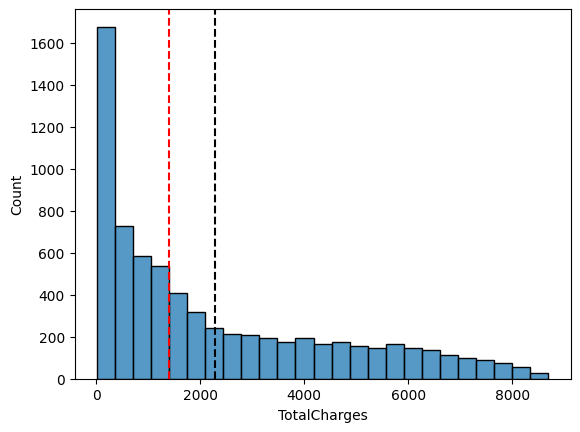

In [12]:
sns.histplot(df_churn['TotalCharges'])
plt.axvline(df_churn['TotalCharges'].mean(), ls='--', color='black')
plt.axvline(df_churn['TotalCharges'].median(),ls='--', color='red')

Com esse histograma podemos ver que os dados são muito dispersos para a direita, o que puxa a média para lá. Entretando, existe uma grande concentração de valores, com altas repetições, para a esquerda, onde a mediana se localiza. O que indica que ela é quem deve ser usada para a substituição.

Antes disso, fizemos um último teste com o np.log

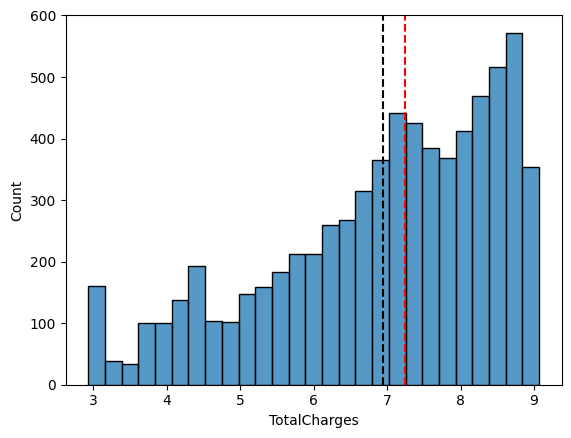

In [13]:
sns.histplot(np.log(df_churn['TotalCharges']))
plt.axvline(np.log(df_churn['TotalCharges']).mean(), ls='--', color='black')
plt.axvline(np.log(df_churn['TotalCharges']).median(),ls='--', color='red')

Assim, decidimos usar a mediana para substituir os NaN

In [14]:
df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].median(), inplace=True)

In [15]:
df_churn['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

- Excluir a coluna de customerID

Como esta é uma coluna que possui dados irrelevantes para os nossos modelos decidimos retirá-la do DataFrame.

In [16]:
df_churn.drop(columns='customerID', axis=1, inplace=True)

df_churn.head(1).T

,0
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,No
tenure,1
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,No
OnlineBackup,Yes


- Mudar a coluna gender de Female/Male para F/M

In [17]:
#Muda os valores Female e Male para F e M, respectivamente
df_churn['gender'].replace('Female', 'F', inplace=True)
df_churn['gender'].replace('Male', 'M', inplace=True)

df_churn['gender'].unique()

array(['F', 'M'], dtype=object)

- Mudar colunas Yes/No para 0/1

In [18]:
#salva os nomes das colunas
colunas = df_churn.columns 

#Muda Yes/No para 1/0 nas colunas que tem apenas esses dois valores
for c in colunas:
    if len(df_churn[c].unique())==2: df_churn[c].replace({'Yes':1, 'No':0}, inplace=True) 

df_churn.head().T

,0,1,2,3,4
gender,F,M,M,M,F
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


Além da mudança ter sido feita de forma correta, observe que as colunas que tem outros valores, além de Yes/No, não foram alteradas. Um exemplo é a coluna MultipleLines que tem Yes, No e No phone service.

- Realizar os dummies

In [19]:
df_churn = pd.get_dummies(
    df_churn, # dataset
    prefix_sep='_',
    columns=[
        'gender',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaymentMethod'
    ]
)

In [20]:
df_churn

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_F,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,True,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,False,...,False,False,True,False,True,False,False,False,False,True
7039,0,1,1,72,1,1,103.20,7362.90,0,True,...,False,False,True,False,True,False,False,True,False,False
7040,0,1,1,11,0,1,29.60,346.45,0,True,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,0,4,1,1,74.40,306.60,1,False,...,True,False,False,True,False,False,False,False,False,True


### **[3. Analise exploratoria dos dados](#3.-Analise-exploratoria-dos-dados)**

#### **[3.1 Estatistica descritiva](#2.1-Estatistica-descritiva)**

In [21]:
#Estatística descritiva

df_churn.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


#### **[3.2 Informacoes gerais dos dados](#3.1-Informacoes-gerais-dos-dados)**

In [22]:
#Informações gerais dos dados

df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   gender_F                                 7043 non-null   bool   
 10  gender_M                                 7043 no

#### **[3.3 Exploracao dos dados e primeiras hipoteses](#3.3-Exploracao-dos-dados-e-primeiras-hipoteses)**

c:\Users\mohar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


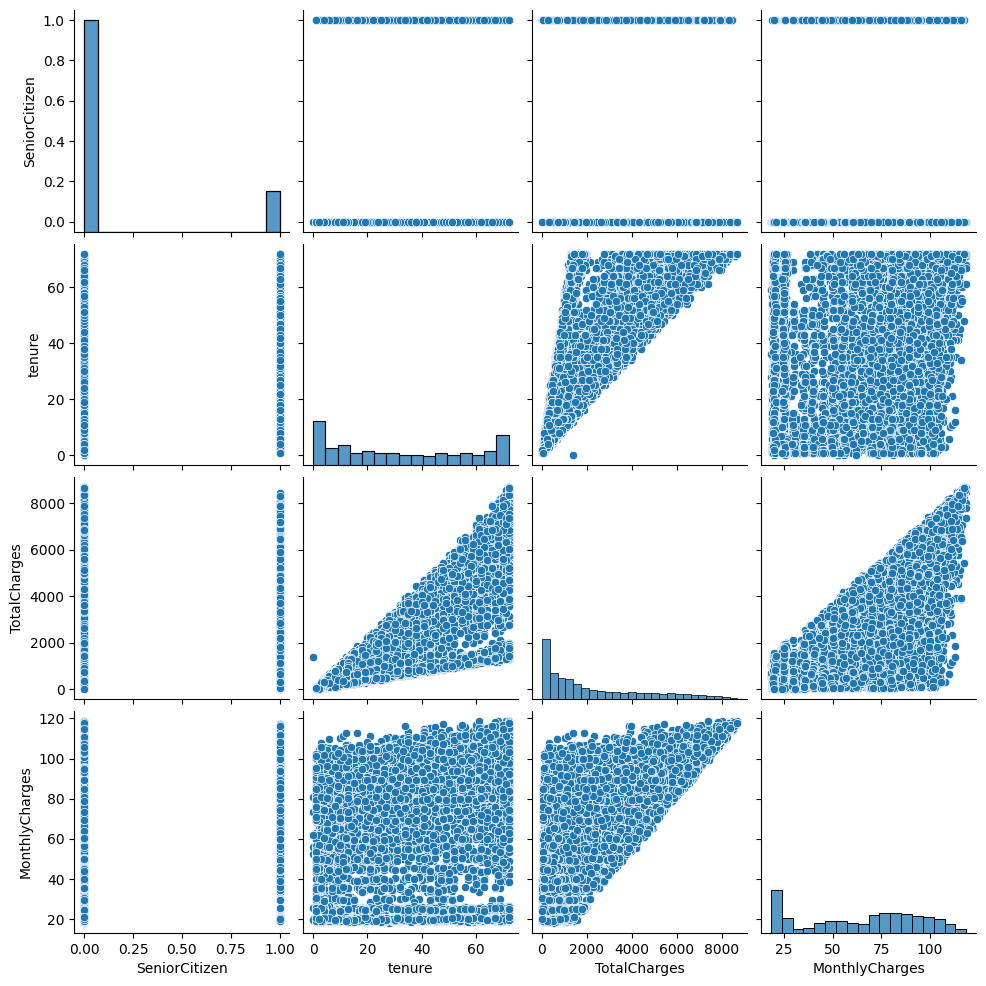

In [23]:
#Mostra a distribuição dos dados par a par de algumas colunas

sns.pairplot(df_churn, vars=['SeniorCitizen', 'tenure', 'TotalCharges','MonthlyCharges'])

Este primeiro gráfico apresentado é interessante pois mostra como as variáveis se distribuem, tanto entre si, quanto par a par. Através dele, é possível ver, de forma clara, as colunas que assumem apenas alguns valores únicos, como a SeniorCitizen que só tem os valores 0 e 1, e as colunas que variam em um intervalo como a tenure, a MonthlyChangers e a TotalCharges. Além disso, é possível ver a quantidade de vezes em que essas variáveis assumem determinados valores e avaliar o tipo de distribuição que representam, como a de MonthluCharges que, pelo gráfico, é próxima de uma distribuição normal e a TotalCharges que se assemelha à uma distribuição lognormal.

c:\Users\mohar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


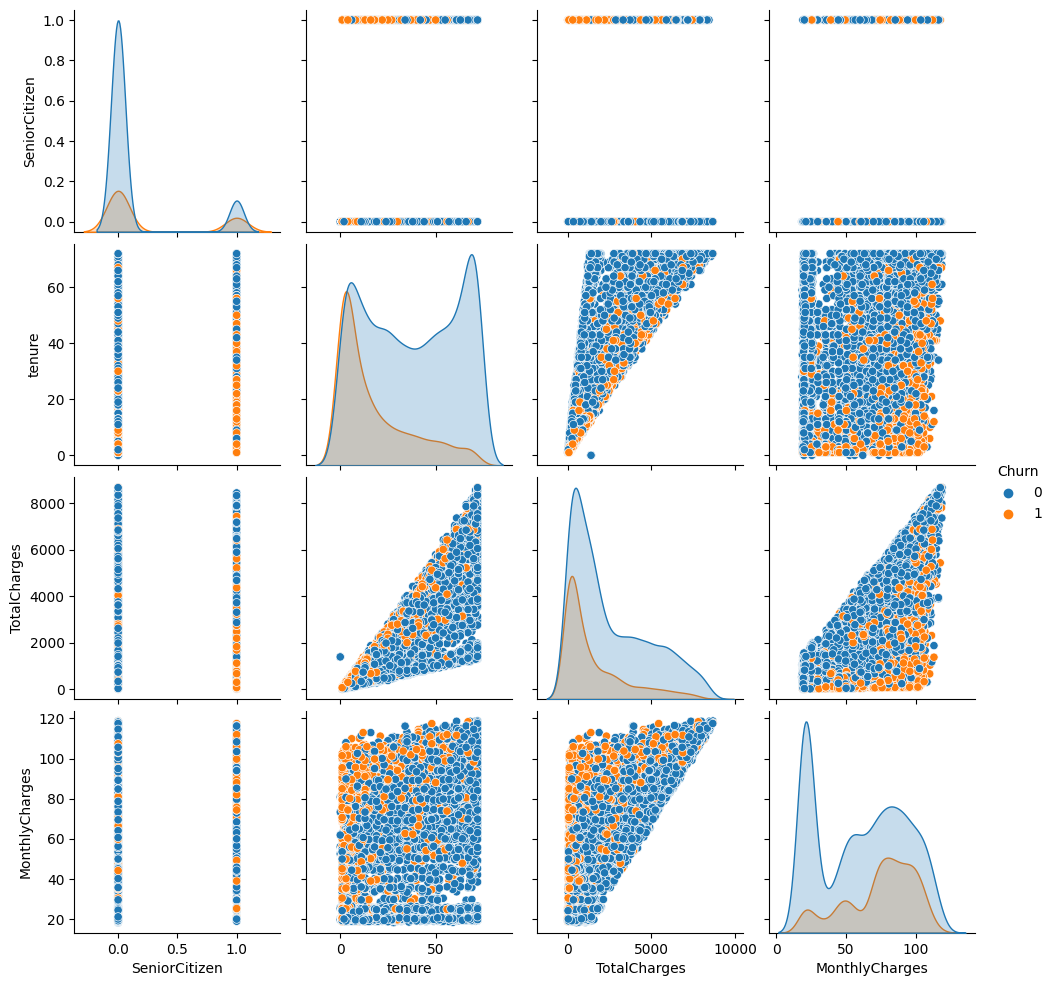

In [24]:
#Relação entre algumas variáveis de acordo com o Churn

#sns.pairplot(df_churn, hue='Churn')
sns.pairplot(df_churn, vars=['SeniorCitizen', 'tenure', 'TotalCharges','MonthlyCharges'], hue='Churn')


### **[4. Modelagem](#4.-Modelagem)**

- Selecionar modelos a serem utilizados
- Explicar potenciais benefícios
- Mostrar principais métricas
- Conclusões iniciais

#### **[4.1 Modelagem com Arvore de Decisao](#4.1-Modelagem-com-Arvore-de-Decisao)**

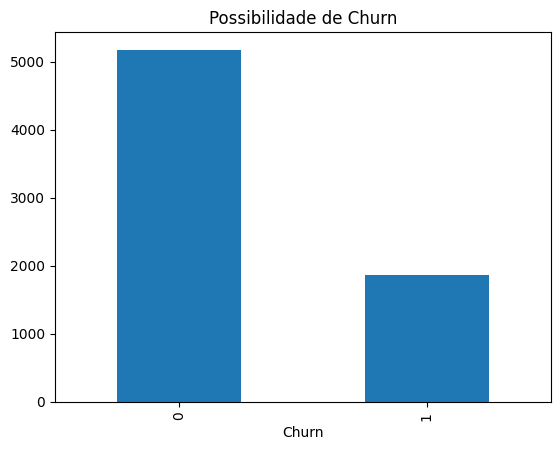

In [25]:
# Verificar se a base é desbalanceada através do target:
df_churn['Churn'].value_counts().plot(kind='bar')
plt.title('Possibilidade de Churn')
plt.show()

In [26]:
#  Separando os Atributos em X e o Target em y
X = df_churn.drop(['Churn'], axis=1)
y = df_churn['Churn']

In [27]:
# Separando a base em treino e teste, dividindo em 70% para treino e 30% para teste:
from sklearn import model_selection

X_train, X_test, y_train, y_test =(model_selection.train_test_split(X, y, test_size=0.3, stratify=y, random_state=42))

In [28]:
# Primeiro modelo escolhido: Árvore de Decisão. Será testada inicialmente com seus valores default:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# Valores default:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [29]:
# Predição a partir da amostra de teste:
y_pred = model.predict(X_test)

# Métricas obtidas:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1552
           1       0.50      0.50      0.50       561

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [30]:
print(f'Precision score: {metrics.precision_score(y_test, y_pred):.4f}')
print(f'Recall score: {metrics.recall_score(y_test, y_pred):.4f}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred):.4f}')

Precision score: 0.4991
Recall score: 0.4991
F1 score: 0.4991


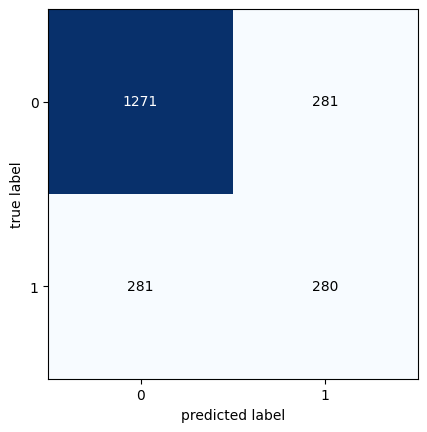

In [31]:
# Matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

def plot_cm(y_test, y_pred): 
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(conf_mat=cm)
  plt.show()

plot_cm(y_test, y_pred)

#### **[4.2 Modelagem com Random Forest](#4.2-Modelagem-com-Random-Forest)**

In [38]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest com uso de 100 árvores
random_model = RandomForestClassifier(
    n_estimators=100,  # Número de árvores
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
#    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

random_model.fit(X_train, y_train)

y_pred = random_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



Comparando as métricas com as apresentadas pelo modelo de Árvore de decisão, é possível ver que hou uma leve melhora nos resultados, o que já era esperado, uma vez que o Random Forest expande as possibilidades de escolhas com a criação de árvores aleatórias. 

Para tentar melhorar ainda mais esse resultado, será feito mais um treinamento do modelo, porém, agora com 1000 árvores.

In [39]:
#Random Forest com uso de 1000 árvores
random_model_1000 = RandomForestClassifier(
    n_estimators=1000,  # Número de árvores
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
#    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

random_model_1000.fit(X_train, y_train)

y_pred = random_model_1000.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.49      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113



Mesmo com o aumento de árvores não houve muito ganho de informações, os valores dos modelos com 100 e 1000 árvores tiveram resultados bem semelhantes, o que pode ser justificado pela possível duplicação dos dados treinados. Dessa forma, concluimos que o número de 1100 árvores é suficiente para extrair as maiores capacidades do modelo (sem considerar uma possível melhoria com a mudança dos outros parmêtros, que continuaram os mesmos).

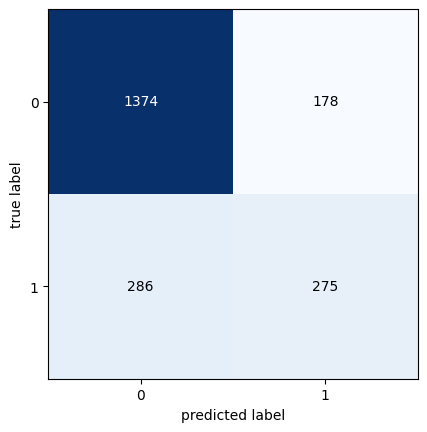

In [42]:
forest_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=forest_cm)
plt.show()

### **[5. Otimizacao de modelos](#5.-Otimizacao-de-modelos)**

- Optimização dos hiperparâmetros, pelo menos um (1) modelo
- Demonstrar de forma clara quais os resultados obtidos

#### **[5.1 Otimizacao da Arvore de Decisao](#5.1-Otimizacao-da-Arvore-de-Decisao)**

In [31]:
# Utilização do Grid Search para otimizar os hiperparâmetros, levando em consideração a Árvore de Decisão:

# Range para os hiperparâmetros
max_depth = [int(x) for x in np.linspace(1, 30, num=8)]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 3, 5]

params_grid = {
  "criterion": ['gini', 'entropy', 'log_loss'],
  "max_depth": max_depth,
  "min_samples_split": min_samples_split,
  "min_samples_leaf": min_samples_leaf,
}

# Grid Search
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model,
    param_grid = params_grid,
    scoring='accuracy',
    cv=3, 
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Melhor parâmetro grid_search
grid_search.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [32]:
# Treinando o modelo de Árvore de Decisão com os melhores parâmetros obtidos a partir do Grid Search:
model_gs = DecisionTreeClassifier(**grid_search.best_params_)
model_gs.fit(X_train, y_train)

y_pred_gs = model_gs.predict(X_test)
print(metrics.classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1552
           1       0.61      0.60      0.61       561

    accuracy                           0.79      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113



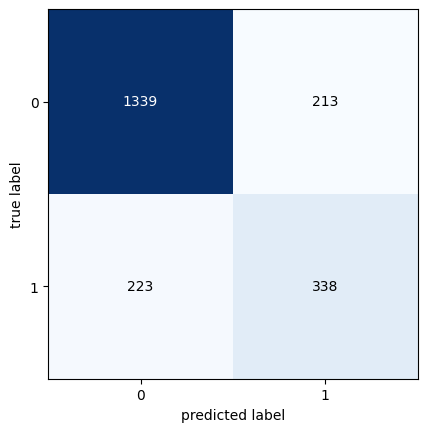

In [33]:
# Matriz de confusão a partir do novo modelo otimizado:
def plot_cm(y_test, y_pred): # cm -> matriz de confusão
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(conf_mat=cm)
  plt.show()

plot_cm(y_test, y_pred_gs)

#### **[5.2 Otimizacao do Random Forest](#5.2-Otimizacao-do-Random-Forest)**

### **[6. Conclusoes](#6.-Conclusoes)**

- Explicar os principais achados (comparação de métricas e modelos)
- Próximos passos
- Potenciais ganhos para o negócio